In [1]:
# Q1(1)
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics

In [2]:
with open("spambase.data") as f:
    lines = [line.lstrip().rstrip().split(",") for line in f]
array_lines = np.array(lines)

data = pd.DataFrame(lines)
nan_num = data.isnull().sum().sum()
print(nan_num)
x_data = data.loc[:, 0:56].values.astype(float)
y_data = data.loc[:, 57].values.astype(int)
print(data.shape, x_data.shape, y_data.shape)

0
(4601, 58) (4601, 57) (4601,)


In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
1,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
2,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
3,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.135,0,0.135,0,0,3.537,40,191,1


In [4]:
lab = data.iloc[:,57].tolist()
spam_num = [int(i) for i in lab if i == '1']            # 1 for spam
print('Total numbers of spam: ', sum(spam_num))

Nspam_num = [i for i in lab if i == '0'].count('0')     # 0 for non-spam
print('Total numbers of non-spam: ', Nspam_num)

print('Total data points: ', data.shape[0])
print('Total features: ', data.loc[:, :56].shape[1])

Total numbers of spam:  1813
Total numbers of non-spam:  2788
Total data points:  4601
Total features:  57


In [5]:
# Q1(2)
# Randomly split into train and test data.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=1)

# Dicison Tree (max_depth = 3)
model = DecisionTreeClassifier(random_state=1, max_depth=3)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [6]:
# Prediction of Decison Tree
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy is {0:.4f}".format(accuracy))

Accuracy is 0.8871


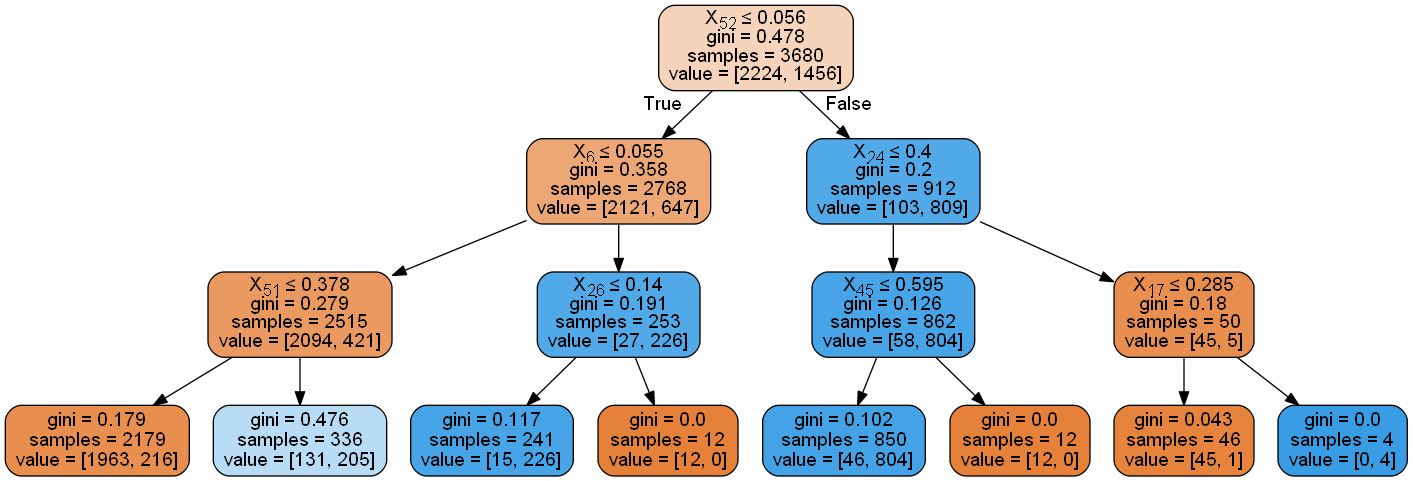

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [11]:
#Q1(3) Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Model fit and prediction
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy is {0:.4f}".format(accuracy))

Accuracy is 0.9186


In [12]:
# Compare Decision Tree and Random Forest
Accurate_DT = []
Accurate_RF = []
for k in range(1,50):
    model1 = DecisionTreeClassifier(max_depth=k, random_state=1)
    model1.fit(x_train, y_train)
    y_pred1 = model1.predict(x_test)
    Accurate_DT.append(metrics.accuracy_score(y_test, y_pred1))
    
    model2 = RandomForestClassifier(max_depth=k, n_estimators=100, random_state=1)
    model2.fit(x_train, y_train)
    y_pred2 = model2.predict(x_test)
    Accurate_RF.append(metrics.accuracy_score(y_test, y_pred2))    

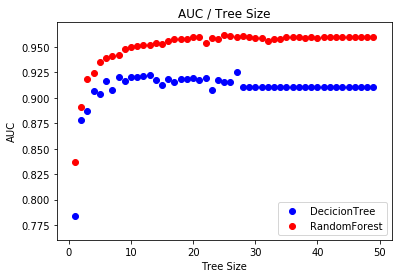

In [13]:
plt.scatter(range(1,50), Accurate_DT, color='blue', label='DecicionTree')
plt.scatter(range(1,50), Accurate_RF, color='red', label='RandomForest')
plt.title("AUC / Tree Size")
plt.legend(loc='lower right')
plt.xlabel("Tree Size")
plt.ylabel("AUC")
plt.show()